# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('dataset//Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [2]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

There are 93 unique job titles.

Average Salary per Work Year:
   work_year  salary_in_usd
0       2020   92302.631579
1       2021   94087.208696
2       2022  133379.510804
3       2023  148954.558413

Average Salary by Experience Level:
  experience_level  salary_in_usd
0               EN   78546.284375
1               EX  194930.929825
2               MI  104544.864030
3               SE  153062.468626


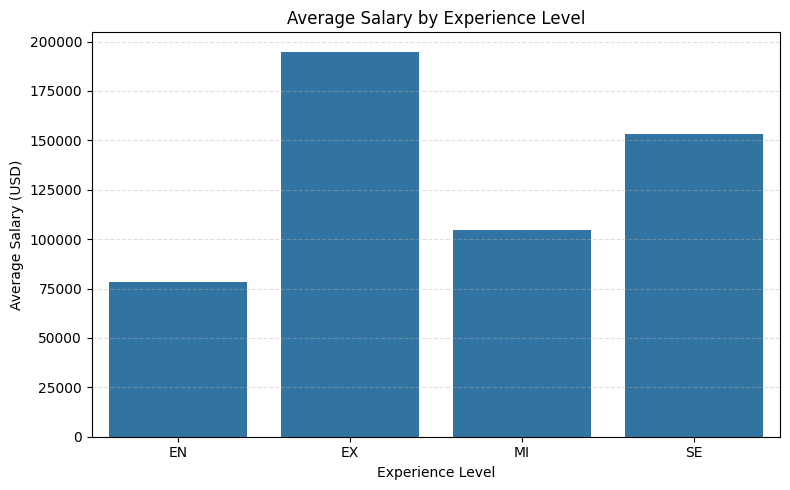

In [8]:
# Your EDA code here
#How many unique job titles?
unique_job_titles = df['job_title'].nunique()
print(f"There are {unique_job_titles} unique job titles.")

#Average salary per work year
avg_salary_per_year = df.groupby('work_year')['salary_in_usd'].mean().reset_index()
print("\nAverage Salary per Work Year:")
print(avg_salary_per_year)

#Average salary by experience level
avg_salary_exp = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
print("\nAverage Salary by Experience Level:")
print(avg_salary_exp)

#Bar plot
plt.figure(figsize=(8,5))
sns.barplot(data=avg_salary_exp, x='experience_level', y='salary_in_usd')
plt.title("Average Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.grid(axis='y', alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()

## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

In [13]:
#Initialize label encoder
le = LabelEncoder()

#Categorical variables
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])
df['company_size_encoded'] = le.fit_transform(df['company_size'])
df['employment_type_encoded'] = le.fit_transform(df['employment_type'])
df['job_title_encoded'] = le.fit_transform(df['job_title'])

#Select your features (customizable)
features = [
    'work_year',
    'experience_level_encoded',
    'employment_type_encoded',
    'company_size_encoded',
    'job_title_encoded'
]
X = df[features]
y = df['salary_in_usd']
X.head()


,work_year,experience_level_encoded,employment_type_encoded,company_size_encoded,job_title_encoded
0,2023,0,2,0,8
1,2023,0,2,0,8
2,2023,0,2,0,41
3,2023,0,2,0,22
4,2023,0,2,0,8


## 📈 Part 4: Train a Linear Regression Model

In [15]:
#Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluation Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.17
RMSE: 58449.78


## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [17]:
# Map experience levels to encoded values (check your LabelEncoder!)
# Example: EN=0, MI=1, SE=2, EX=3 (confirm with `le.classes_`)

future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3]  # EN, MI, SE, EX
})

#Create future dataset (work_year + all encoded features)
future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3],  # EN, MI, SE, EX (adjust if mapping differs)
    'employment_type_encoded': [0, 0, 0, 0],  # Assume all Full-time (FT)
    'company_size_encoded': [1, 1, 1, 1],      # Assume Medium company (adjust if needed)
    'job_title_encoded': [10, 10, 10, 10]      # Using common job title (e.g. Data Scientist)
})
#Predict
future_predictions = model.predict(future_data)

#Display results nicely
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': future_predictions
})
results

,Experience Level,Predicted 2024 Salary (USD)
0,Entry,120333.110582
1,Mid,140373.728408
2,Senior,160414.346235
3,Executive,180454.964061


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
2. What are the limitations of using only `work_year` and `experience_level`?
3. How could you improve this model? (Think: more features, better encoding, etc.)
4. Why is **R² not enough** to trust your predictions?

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀

## Part 6: Reflection (Answers)

1. I think my model does not make very reasonable predictions. It only scored around 13% (R² = 0.13), which means it has very low predictive capability and cannot explain much of the salary variation.

2. One reason is that there are too few features included in the model. Salary depends on many other important factors like location, skills, and the company. So the information used for prediction is not enough to produce a good model.
   
3. To improve the model, I should use more useful columns that actually affect salary, and apply better encoding methods for categorical data.

4. R² alone is not enough to trust the predictions because even if we get a score, it does not guarantee the model's predictions are accurate. Since the score is low, the prediction quality is also low, meaning the model barely predicts correctly.
